In [ ]:
#LSTM RNN to predict price of alphabet using data of 5 years


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import matplotlib.pyplot as plt

In [2]:
import pandas_datareader.data as web

In [3]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime.now()

In [4]:
df = web.DataReader("GOOGL", 'yahoo', start, end)

In [5]:
df.reset_index(inplace = True)

In [6]:
len(df)

1526

In [7]:
train_data = df.iloc[:1226]
test_data= df.iloc[1226:-1]

In [8]:
train_data

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-12-31,538.400024,530.200012,537.739990,530.659973,1232400,530.659973
1,2015-01-02,535.799988,527.880005,532.599976,529.549988,1324000,529.549988
2,2015-01-05,527.989990,517.750000,527.150024,519.460022,2059100,519.460022
3,2015-01-06,521.210022,505.549988,520.500000,506.640015,2722800,506.640015
4,2015-01-07,511.489990,503.649994,510.950012,505.149994,2345900,505.149994
...,...,...,...,...,...,...,...
1221,2019-11-06,1292.989990,1282.270020,1290.089966,1291.010010,1231300,1291.010010
1222,2019-11-07,1322.650024,1293.750000,1294.280029,1306.939941,2257000,1306.939941
1223,2019-11-08,1317.109985,1301.520020,1301.520020,1309.000000,1519600,1309.000000
1224,2019-11-11,1304.900024,1295.869995,1304.000000,1298.280029,861700,1298.280029


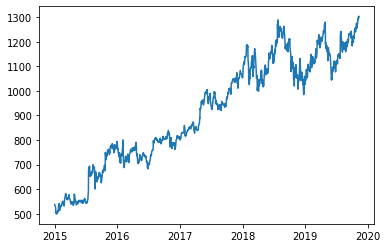

In [9]:
plt.plot(train_data['Date'], train_data['Open'])
plt.show()

In [10]:
#get open prices from train data
train_set = train_data.iloc[:, 3].values
print(type(train_set))

<class 'numpy.ndarray'>


In [11]:
train_set = train_set.reshape(1226,1)

In [12]:
#scaling of data imp for neural networks
#scaling of train open prices
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(train_set)
print(scaled_data)

[[0.04784035]
 [0.04145333]
 [0.03468119]
 ...
 [0.99691836]
 [1.        ]
 [0.99325258]]


In [15]:
X_train

array([[0.04784035, 0.04145333, 0.03468119, ..., 0.09733339, 0.08127893,
        0.07777477],
       [0.04145333, 0.03468119, 0.02641783, ..., 0.08127893, 0.07777477,
        0.07581143],
       [0.03468119, 0.02641783, 0.01455095, ..., 0.07777477, 0.07581143,
        0.07294102],
       ...,
       [0.83153991, 0.8468985 , 0.86061678, ..., 0.98409458, 0.9827153 ,
        0.9879219 ],
       [0.8468985 , 0.86061678, 0.86499078, ..., 0.9827153 , 0.9879219 ,
        0.99691836],
       [0.86061678, 0.86499078, 0.86557476, ..., 0.9879219 , 0.99691836,
        1.        ]])

In [16]:
y_train = y_train.reshape(1166,1)

In [14]:
# Creating a data structure with 60 timesteps and 1 output
#rolling time period og 60 days,you get len(train_set) - 60 as shape
X_train = []
y_train = []

for i in range(60, 1226):
    X_train.append(scaled_data[i - 60 : i, 0])
    y_train.append(scaled_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [17]:
X_train.shape

(1166, 60)

In [18]:
# Reshaping the data - used to add a new dimension to the data

'''Input shape for rnn: 3D tensor with shape (number of rows of data, timesteps, input_dim)'''

batch_size = X_train.shape[0]
timesteps = 60
no_of_predictors = 1 # input_dim
X_train = np.reshape(X_train, (batch_size, timesteps, no_of_predictors))
print(X_train.shape)


(1166, 60, 1)


In [19]:
# Importing the Keras libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [37]:
# Building our regressor
regressor = Sequential()

# Adding the first LSTM layer and a dropout regularisation layer
regressor.add(LSTM(units = 60, 
                  return_sequences = True,input_shape=(X_train.shape[1],1)))

# Dropout regularisation 
regressor.add(Dropout(rate = 0.2)) # 20% dropout

In [38]:
# Adding the second LSTM layer and a dropout regularisation 
regressor.add(LSTM(units = 30, return_sequences = True))
regressor.add(Dropout(rate = 0.2))


In [39]:

# Adding the third LSTM layer and dropout regularisation 
regressor.add(LSTM(units = 15, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [40]:
# Adding the fourth LSTM layer and dropout regularisation 
regressor.add(LSTM(units = 8, return_sequences = False))
regressor.add(Dropout(rate = 0.2))


In [41]:
regressor.add(Dense(units = 1))

In [42]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# Fitting the RNN to the Training Set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100


In [207]:
test_data.reset_index(inplace = True)

In [210]:
type(total_data)

pandas.core.series.Series

In [122]:
test_set= test_data.iloc[:,4].values

In [192]:
total_data = pd.concat([train_data['Open'],test_data['Open']], axis = 0)

In [197]:
# Scaling the input data
inputs = np.array(total_data[len(total_data)-len(test_data)-60:])
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)


In [198]:
X_test = []
for i in range(60, 359): 
    X_test.append(inputs[i - 60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test)

[[[0.86499078]
  [0.86557476]
  [0.86306483]
  ...
  [0.99691836]
  [1.        ]
  [0.99325258]]

 [[0.86557476]
  [0.86306483]
  [0.85234113]
  ...
  [1.        ]
  [0.99325258]
  [0.98655506]]

 [[0.86306483]
  [0.85234113]
  [0.82038117]
  ...
  [0.99325258]
  [0.98655506]
  [0.98881654]]

 ...

 [[1.3303469 ]
  [1.34917242]
  [1.38651281]
  ...
  [1.52602011]
  [1.55279834]
  [1.52813263]]

 [[1.34917242]
  [1.38651281]
  [1.38645061]
  ...
  [1.55279834]
  [1.52813263]
  [1.54550424]]

 [[1.38651281]
  [1.38645061]
  [1.35405593]
  ...
  [1.52813263]
  [1.54550424]
  [1.64910034]]]


In [199]:
# Making predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
#predicted_stock_price

In [200]:
len(predicted_stock_price)

299

In [201]:
len(test_data)

299

In [209]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae_acc = mean_absolute_error(y_true = real_stock_price, y_pred = predicted_stock_price)
mse_acc = mean_squared_error(y_true = real_stock_price, y_pred = predicted_stock_price)
print("Mean Absolute Error: {}".format(mae_acc))
print("Mean Suared Error: {}".format(mse_acc))

Mean Absolute Error: 50.71900434717287
Mean Suared Error: 4182.41150067647


In [204]:
real_stock_price = test_data['Open']

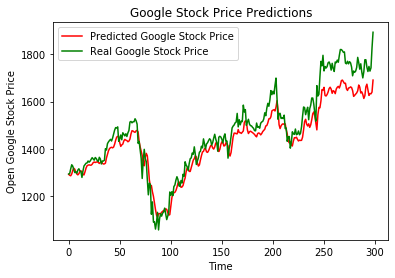

In [211]:
plt.plot(predicted_stock_price, color = 'r', label = 'Predicted Google Stock Price')
plt.plot(real_stock_price, color = 'g', label = 'Real Google Stock Price')

plt.title('Google Stock Price Predictions')

plt.xlabel('Time')
plt.ylabel('Open Google Stock Price')
plt.legend()
plt.show()
